In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

In [ ]:
"""
    sklearn 당뇨병 진행도 데이터

    <x>
    Age
    Sex
    Body mass index
    Average blood pressure
    S1 : 혈청에 대한 6가지 지표들
    S2
    S3
    S4
    S5
    S6
    
    *데이터가 각 컬럼의 합이 1이 되도록 centering, scaling 되어 있습니다 
    
    
    <y> 
    target: a quantitative measure of disease progression one year after baseline

"""

In [2]:
# Data Load 
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = pd.DataFrame(diabetes.data)
y = pd.Series(diabetes.target)
data = pd.concat([X,y], axis = 1)
data.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [3]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
data.shape

(442, 11)

## 1. Data Description 

In [5]:
# 결측치 체크 
data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
# data type 체크 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## 2. Target distribution 

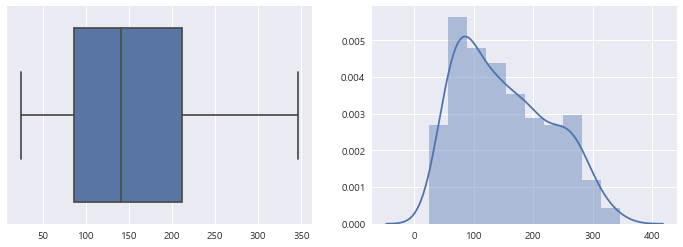

In [9]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["target"]], ax=ax1)
sns.distplot(data[["target"]],ax=ax2)

* target 분포는 나름 정규분포의 향상을 보이고 있어요 (skewed 되어 있으면 log Transformation 등의 조치를 취해 주어야 함) 
* 이상점은 없는 것 처럼 보이네요 ! 

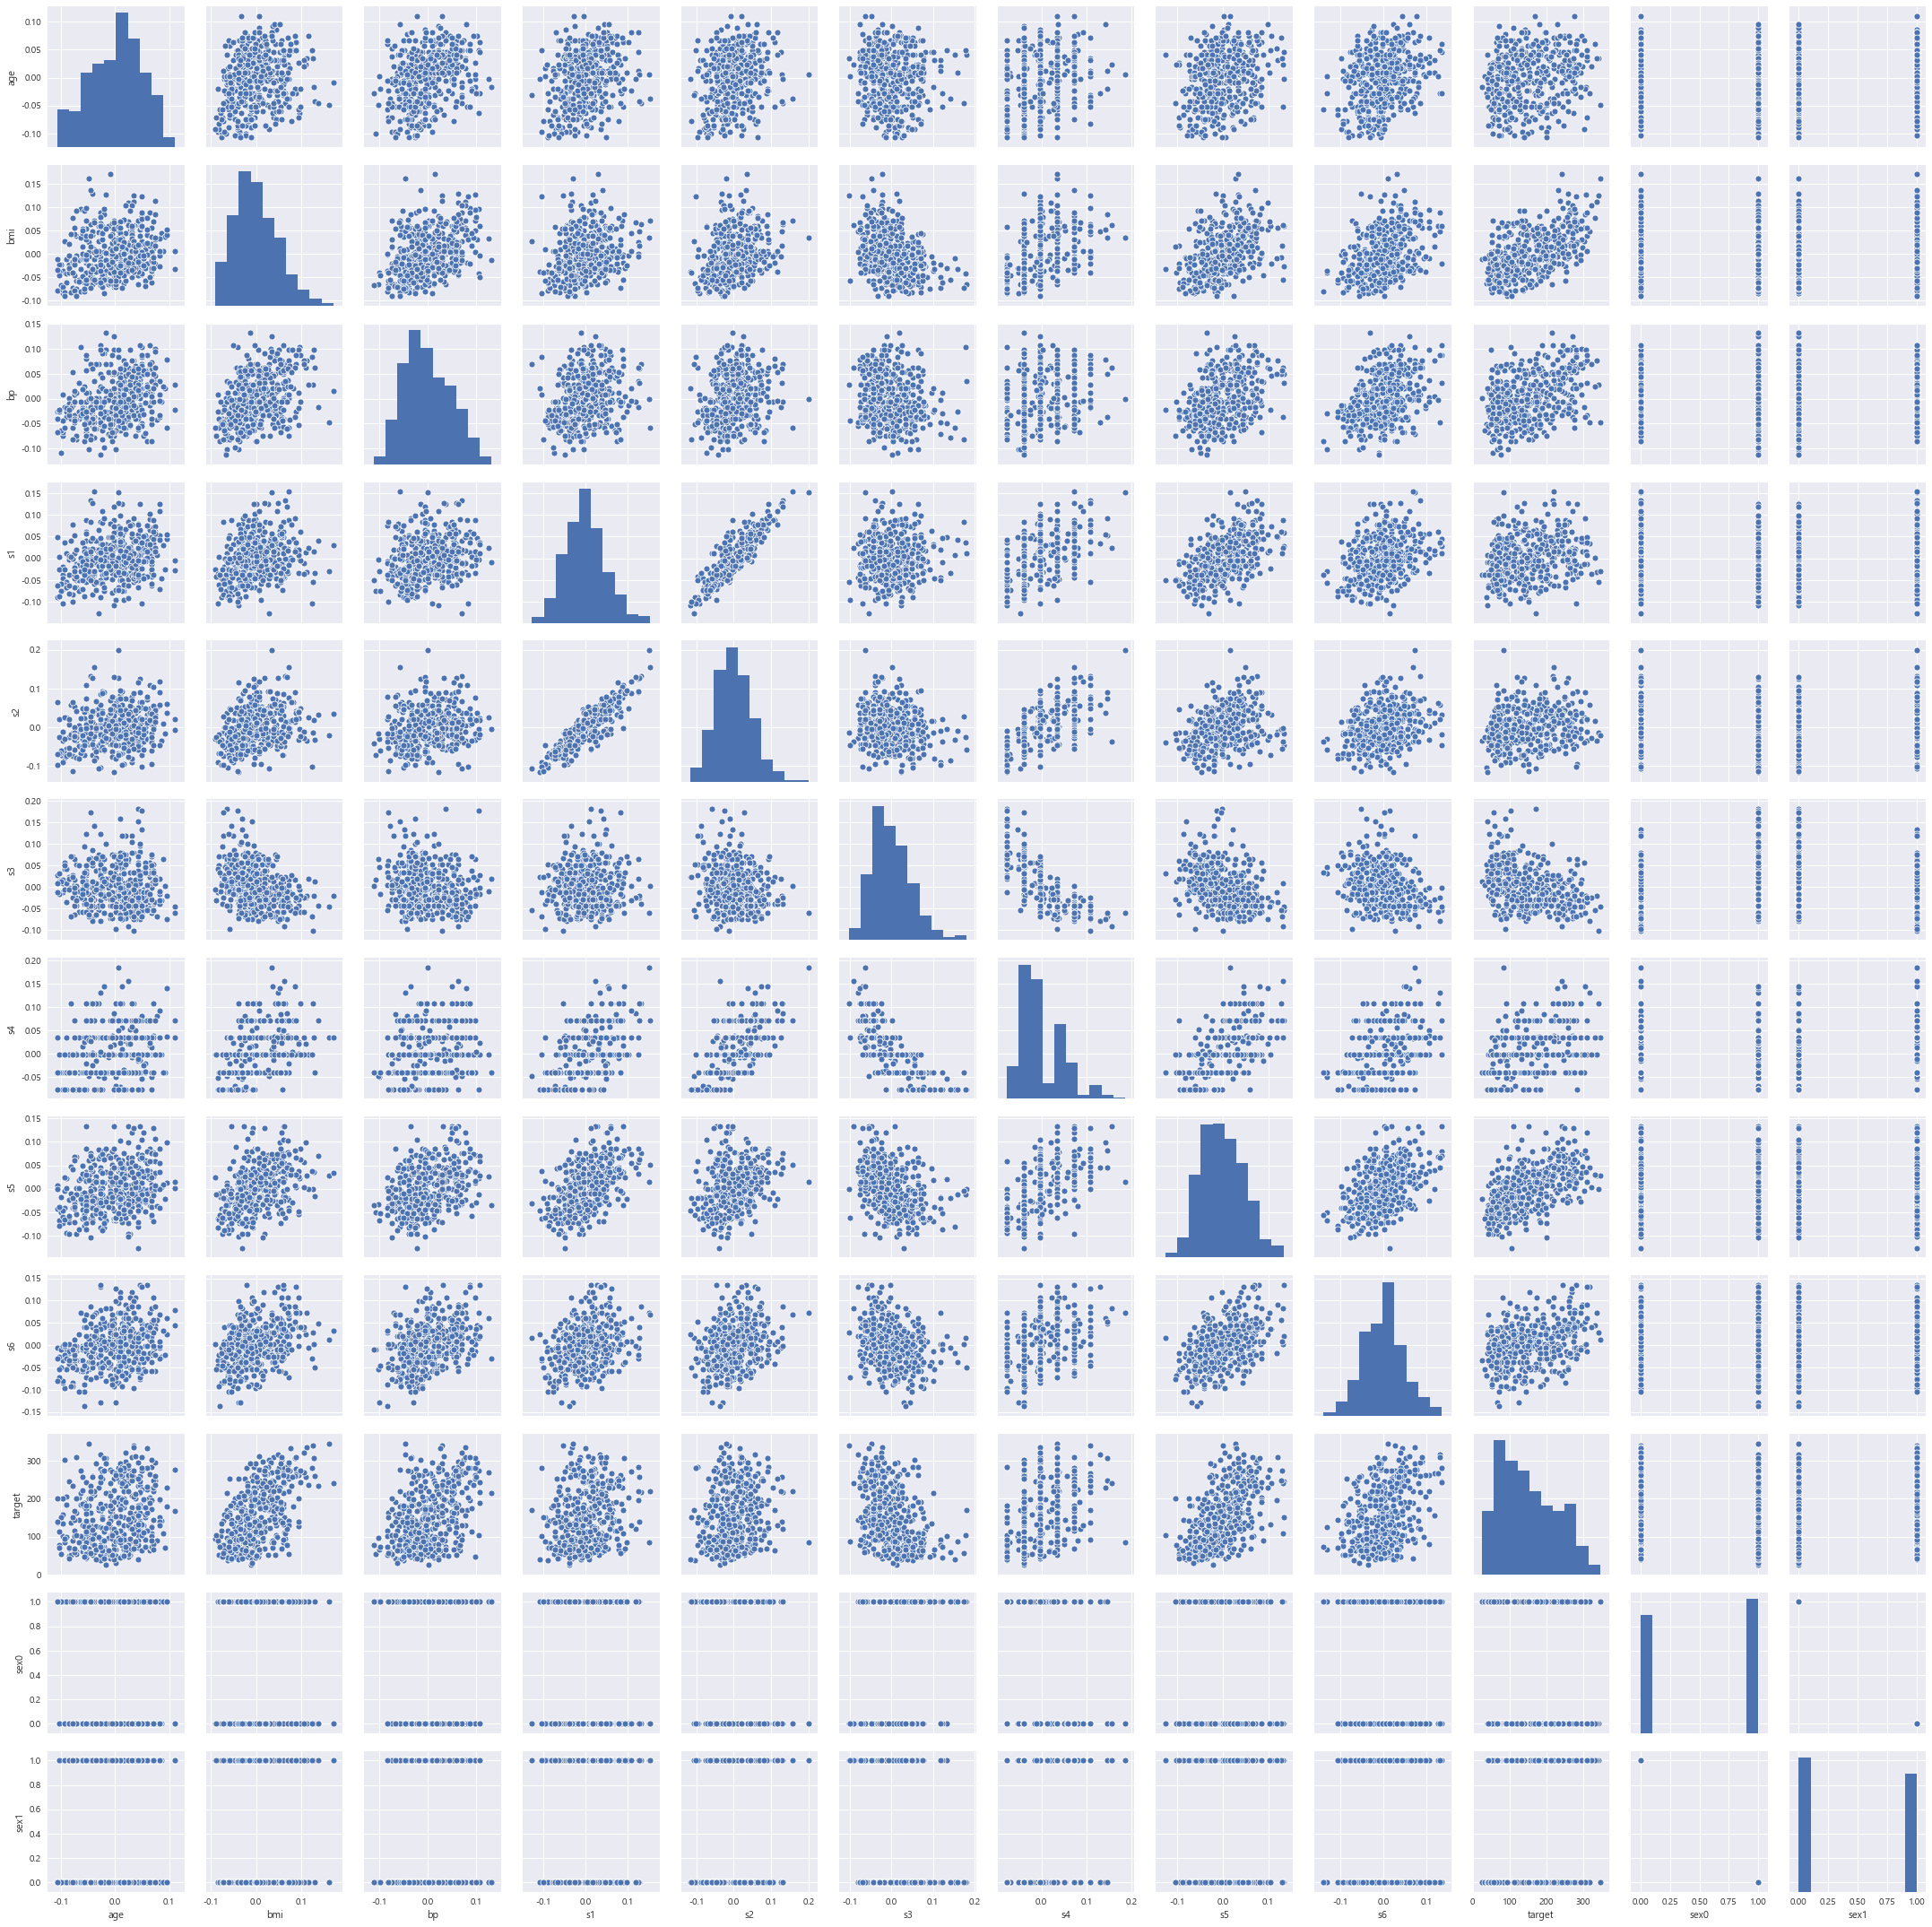

In [29]:
# 회귀분석 기본 가정 검토 : 선형성 
sns.pairplot(data)

* s4의 경우 조금 의심가기는 하지만, 
* 대부분의 변수들이 선형성을 만족하고 있다고 할 수 있어요

# Data Preprocessing 

## 1. Categorical Variable 

In [19]:
data["sex"].unique()

array([ 0.05068012, -0.04464164])

In [21]:
dummy = pd.get_dummies(data.sex)
dummy.columns=['sex0','sex1']
dummy.head()

,sex0,sex1
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [22]:
data = pd.concat([data, dummy], axis=1)
data = data.drop(['sex'], axis=1)
data.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target,sex0,sex1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,1,0


## 2. 변수들 간의 상관관계  

In [24]:
X = data.drop(['target'], axis=1)
y = data.target

In [26]:
# correlation matrix 
X.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex0,sex1
age,1.000000,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,-0.173737,0.173737
bmi,0.185085,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,-0.088161,0.088161
bp,0.335427,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,-0.241013,0.241013
s1,0.260061,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,-0.035277,0.035277
s2,0.219243,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,-0.142637,0.142637
s3,-0.075181,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,0.379090,-0.379090
s4,0.203841,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,-0.332115,0.332115
s5,0.270777,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,-0.149918,0.149918
s6,0.301731,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,-0.208133,0.208133
sex0,-0.173737,-0.088161,-0.241013,-0.035277,-0.142637,0.379090,-0.332115,-0.149918,-0.208133,1.000000,-1.000000


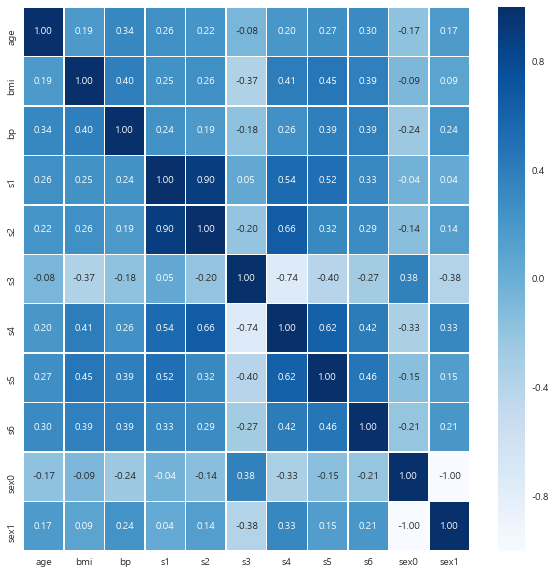

In [27]:
# heatmap : correlation matrix 시각화 
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

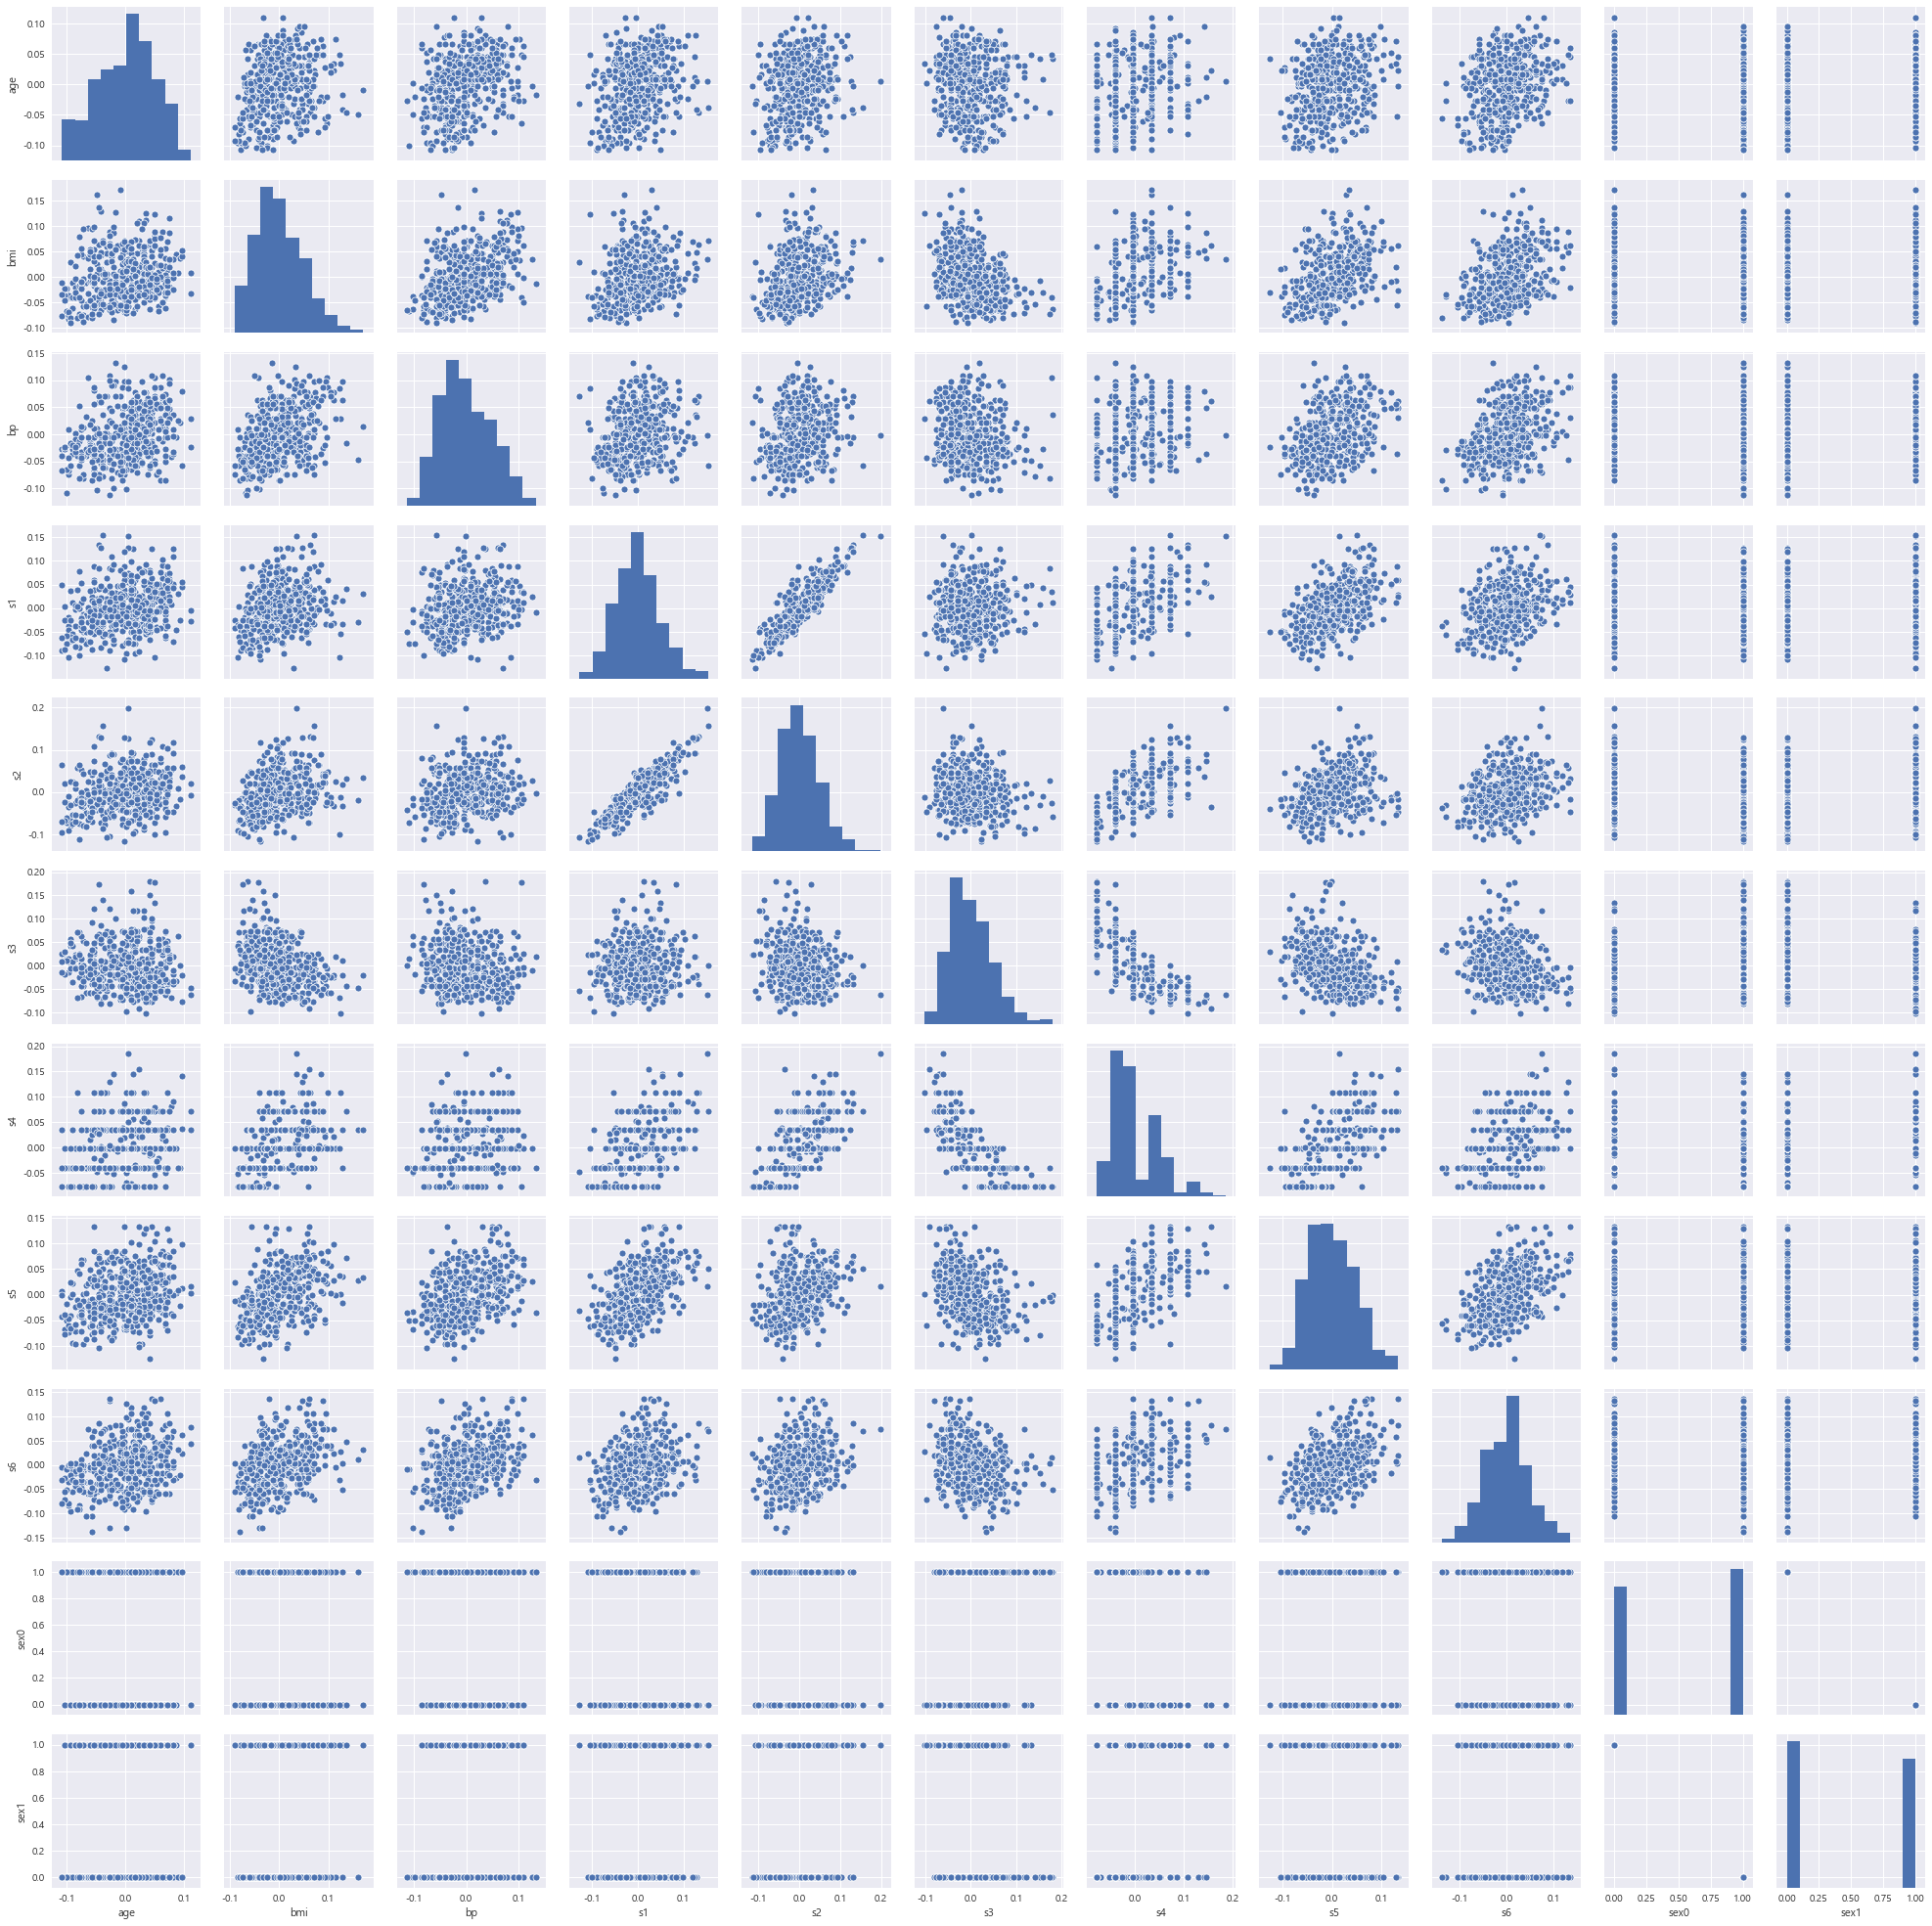

In [25]:
# 변수들 사이의 pairplot 
sns.pairplot(X)

* s1, s2는 높은 선형 관계를 보이고 있어요  
* s5, s6의 경우 상관계수는 0.46 이지만, 산점도를 보았을 때 선형 관계를 띄고 있다고 볼 수 있으므로 한번 체크해 보기로 합시다 ! 

In [28]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,59.203786,s1
4,39.194379,s2
5,15.402352,s3
7,10.076222,s5
6,8.890986,s4
1,1.509446,bmi
8,1.484623,s6
2,1.459429,bp
0,1.217307,age
10,1.147844,sex1


* 다중공선성 의심 변수 : s1, s2, s3, s5
* 다중공선성이 의심가는 변수를 제거해 가며 모델을 판단해 보기로 합니다 

In [31]:
X2 = X.drop(['s1'], axis=1)

In [32]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
5,7.818675,s4
4,3.736893,s3
3,2.926545,s2
6,2.172865,s5
1,1.502327,bmi
7,1.484410,s6
2,1.457415,bp
0,1.216892,age
9,1.146237,sex1
8,1.128813,sex0


* s1 변수를 제거했더니, 다중공선성 문제가 해결되었네요 ^_^  

## 3. target 변수와의 상관관계 

In [30]:
data.corr()['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex1      0.043062
sex0     -0.043062
s3       -0.394789
Name: target, dtype: float64

* 여기서 상관관계가 지나치게 높게 나타나면 해당 변수의 영향력이 너무 지나치게 크다고 판단할 수 있는데, 
* 현 상황에서는 괜찮아 보여요 ! 

# Modeling 

> 1. from sklearn.linear_model import LinearRegression
> 2. import statsmodels.api as sm

## 1. sklearn LinearRegression

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [34]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [35]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# predict
pred = model.predict(X_train)

In [36]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.5509511284994073

In [41]:
mean_squared_error(y_train, pred)

2752.982855950595

In [42]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[ -32.02315078  573.1051329   297.36444115 -187.58783731 -279.76186988
   63.63991541  487.63633543   45.40157191   11.3789958   -11.3789958 ]
151.67771141526134


In [43]:
# test data R-square
model.score(X_test, y_test)

0.3235080332827156

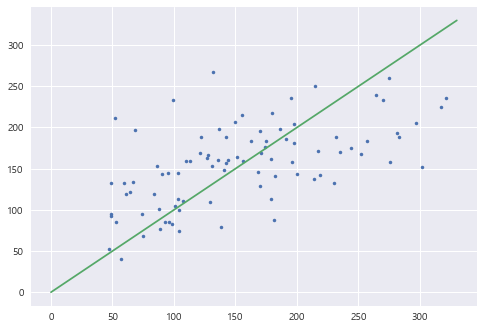

In [44]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

### Ridge, Lasso Regression 

In [45]:
ridge = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
# R-square
ridge.score(X_train,y_train)

0.4724942595995212

In [47]:
# Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5275861106431707

## 2. statsmodel OLS 

In [48]:
import statsmodels.api as sm

In [49]:
data2 = data.drop(['s1'], axis=1)
data2.columns

Index(['age', 'bmi', 'bp', 's2', 's3', 's4', 's5', 's6', 'target', 'sex0',
       'sex1'],
      dtype='object')

In [51]:
X2 = data2.drop(["target"], axis=1)
y = data2.target

In [52]:
model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     50.71
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.06e-62
Time:                        07:34:22   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     432   BIC:                             4837.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -7.9167     59.920     -0.132      0.8

### backward 

In [53]:
# p-value 값이 큰 age 변수 제거해보기 
X3 = X2.drop(["age"], axis=1)
y = data2.target

In [54]:
model = sm.OLS(y, X3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     57.17
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.94e-63
Time:                        07:35:41   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     433   BIC:                             4831.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          528.5663     66.501      7.948      0.0

In [55]:
# p-value 값이 큰 s4 변수 제거해보기 
X4 = X3.drop(["s4"], axis=1)
y = data2.target

In [56]:
model = sm.OLS(y, X4)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     65.43
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           5.22e-64
Time:                        07:36:37   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     434   BIC:                             4825.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          527.0136     66.358      7.942      0.0

* 익스트림하게 좋아지지는 않네요 ㅜㅜ 
* 그치만 모델 성능 지표들이 비슷한 상황이면, 간단한 모델이 제일 베스트겠죠..??

## 회귀분석 가정 검토 

In [57]:
import scipy.stats

In [65]:
# 모델을 통해 얻은 예측값 
pred = result.predict()

In [62]:
# 잔차 = 실제값 - 예측값 
residual = data['target'] - result.predict() 

In [63]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

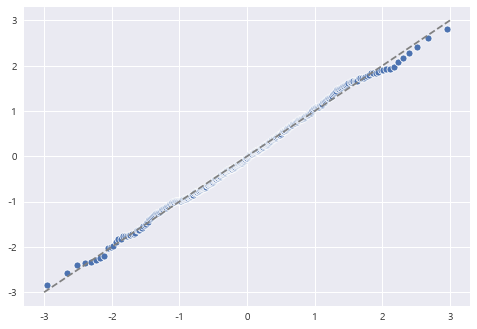

In [68]:
# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

* Normal Q-Q Plot을 그려 보았을 때, 잔차가 직선의 형태를 아주 잘 따라가고 있으므로 
* 잔차의 정규성을 만족하는 것으로 보입니다 ! 

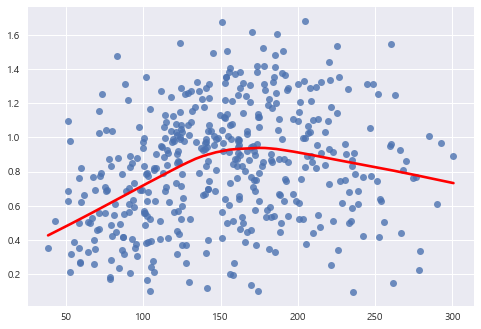

In [67]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

* 잔차가 나름 고르게 흩어져 있는 것으로 보아 등분산성도 어느정도 만족한다고 볼 수 있어요 
* 원래 이상적으로 만족하는 경우.. 빨간선이 수평이 된다고 합니다 ^_ㅠ 